In [1]:
# Such that changes in external libraries get updated
%load_ext autoreload
%autoreload 2

import plotMiFuncs as pmf
from opal.parser.H5Parser import H5Parser

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Ellipse

# Such that backgrounds of plots are white and not transparent
import matplotlib as mpl
mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["savefig.facecolor"] = "white"

import numpy as np
import pandas as pd
import os

fs = 17
dQ = 10  # Tolerance accepted in pC

pltpath = 'tests/new_plots_Nov2021'

rotation = 0.0  # I consider 0 rotation, since I actually have no idea if YAG screens are aligned with each other, so I will just assume they are and not do any rotation

Ldr = (207 + 123.55 + 23.5 + 25.5 + 76.3 + 57.5 + 24.5 + 59 + 32.75 + 49) * 1e-2
print(Ldr)

6.7860000000000005


# DY13, TDCon, spect off

## Wiggler out

shot 1
opening /home/arnau/documents/ETHZ/MScThesis/experiment_data/DYG13_TDC=on_spect=off/21-08/case1/wig_out/DYG13_TDCon_yFocusing_Blackfly/Imag_raw_Shot_001.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)


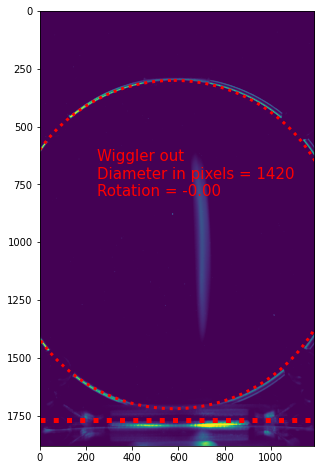

rotation for DYG14 is 0.7
for DYG13 it is -0.5


In [3]:
# Find the YAG image in pixels
i = 1  # Shot number
print('shot', i)
rotation = -0.0
fn = '/home/arnau/documents/ETHZ/MScThesis/experiment_data/' + 'DYG13_TDC=on_spect=off/21-08/case1/wig_out/DYG13_TDCon_yFocusing_Blackfly/Imag_raw_Shot_0{:02d}.rimg'.format(i)
M = pmf.getM(fn, crop = [0.01, 0.999, 0.01, 0.99], rot = rotation)

Ldyg13 = 1420

fig, ax = plt.subplots(figsize = (10,8))
ax.imshow(M)
ax.text(250, 800, 
        'Wiggler out\nDiameter in pixels = {:02d}\nRotation = {:.2f}'.format(Ldyg13, rotation), color = 'red', fontsize = 15)

ax.axhline(1770, lw = 5, color = 'red', ls = ':')  # To calibrate screen rotation
ax.add_patch(Ellipse((580, 1010), Ldyg13, Ldyg13, color = 'red', linewidth = 3, fill = 0, ls = ":"))
plt.show()

print('rotation for DYG14 is 0.7')
print('for DYG13 it is -0.5')

In [4]:
## Charge scan
fn = '/home/arnau/documents/ETHZ/MScThesis/experiment_data/' + 'DYG13_TDC=on_spect=off/21-08/case1/wig_out/DYG13_TDCon_yFocusing_LeCroy/'
best_cases = []

charge_scan = np.zeros(50)
for k in range(50):
    charge = pmf.integrateCharge(fn + 'ICT_raw_Shot_0{:02d}.rict'.format(k)) * 1e12
    dQloc = np.abs(charge + 300)
    charge_scan[k] = charge
    if dQloc < dQ:
        print('case', k, 'has',  charge, 'pC')
        best_cases.append(k)
df = pd.DataFrame(charge_scan, columns = ['Charge [pC]'])
df.to_csv(fn + '/charge_summary.tsv', sep = '\t', index = True, mode = 'w')

case 9 has -292.07990243768614 pC
case 42 has -299.74075044648583 pC



wig out shot number 9
opening /home/arnau/documents/ETHZ/MScThesis/experiment_data/DYG13_TDC=on_spect=off/21-08/case1/wig_out/DYG13_TDCon_yFocusing_Blackfly/Imag_raw_Shot_009.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -292.08 pC

wig out shot number 42
opening /home/arnau/documents/ETHZ/MScThesis/experiment_data/DYG13_TDC=on_spect=off/21-08/case1/wig_out/DYG13_TDCon_yFocusing_Blackfly/Imag_raw_Shot_042.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -299.74 pC


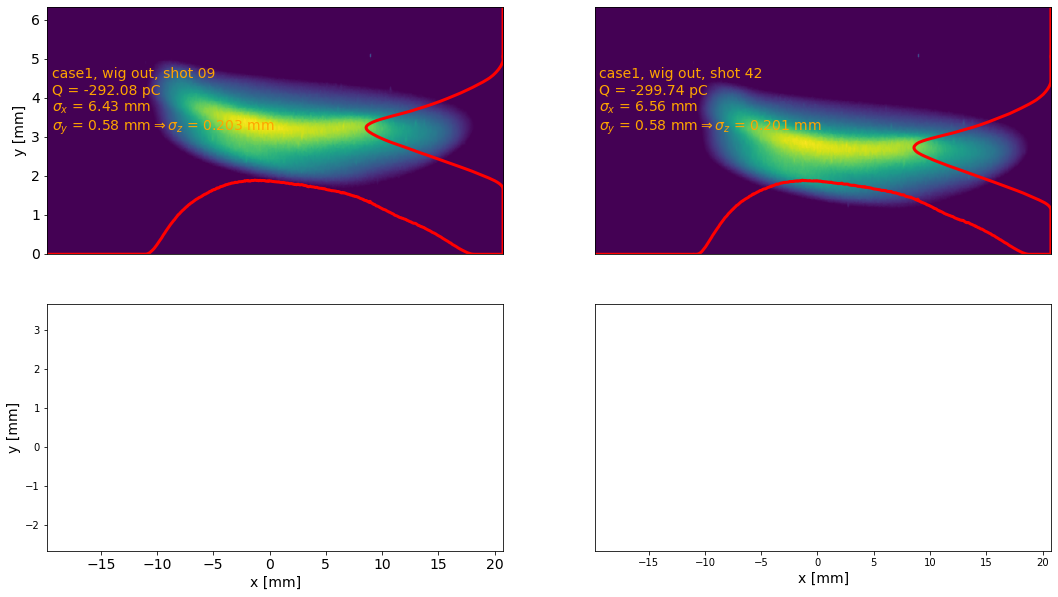

In [6]:
fn = '/home/arnau/documents/ETHZ/MScThesis/experiment_data/' + 'DYG13_TDC=on_spect=off/21-08/case1/wig_out/DYG13_TDCon_yFocusing_Blackfly/'

Lreal = 50  # in mm, Yag size
maxHH = 0.3
TDC = 2.872  # TDC factor

Ms = []
Qs = []

fig, ax = plt.subplots(2,2, figsize = (18, 10))
ax = ax.reshape(-1)
for i,shot in enumerate(best_cases[:4]):
    print('\nwig out shot number', shot)
    Mout = pmf.getM(fn + 'Imag_raw_Shot_0{:02d}.rimg'.format(shot), 
                crop = [.5,.65,.2,.8], rot = rotation, size_filter = 4)
    Mout = Mout.T
    Ms.append(Mout)
    extent = np.array([-0.5, Mout.shape[1] - 0.5, -0.5, Mout.shape[0] - 0.5])
    extent *= Lreal/ Ldyg13

    ax[i].imshow(Mout, extent = extent, aspect = 'auto')
    ax[i].tick_params(axis = 'both', labelsize = fs)
    # Plot histograms and get FWHM, rms and charge
    [x,hist] = pmf.histAx2(ax[i], M = Mout, axis = 0, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
    rmsx = pmf.getRms(x, hist)
    laterx = [x,hist]
    [x,hist] = pmf.histAx2(ax[i], M = Mout, axis = 1, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
    rmsy = pmf.getRms(x, hist)
    latery = [x,hist]
    charge = pmf.integrateCharge(fn + '../DYG13_TDCon_yFocusing_LeCroy/ICT_raw_Shot_0{:02d}.rict'.format(shot)) * 1e12
    Qs.append(charge)
    print('charge = {:.2f} pC'.format(charge))
    # Text with info
    ax[i].text(.01, .5, 'case1, wig out, shot {:02d}\n'.format(shot) +
               'Q = {:.2f} pC\n'.format(charge) + 
               '$\sigma_x$ = {:.2f} mm\n'.format(rmsx) +
               '$\sigma_y$ = {:.2f} mm'.format(rmsy) +
               '$\Rightarrow\sigma_z$ = {:.3f} mm'.format(rmsy/TDC),
               fontsize = fs, color = 'orange', transform = ax[i].transAxes)

# Adjust axes to have same scale
pmf.adjust_axes_limits(ax, 'x')
pmf.adjust_axes_limits(ax, 'y')

# Add axis labels when necessary
ax[0].set_ylabel('y [mm]', fontsize = fs)
ax[2].set_ylabel('y [mm]', fontsize = fs)
ax[2].set_xlabel('x [mm]', fontsize = fs)
ax[3].set_xlabel('x [mm]', fontsize = fs)
ax[1].tick_params(axis = 'y', labelsize = fs)
ax[2].tick_params(axis = 'x', labelsize = fs)
ax[0].set_xticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[3].set_yticks([])

plt.show()

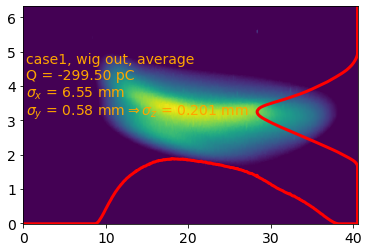

In [7]:
[M,Q] = pmf.average_matrix(Ms, Qs)
extent = np.array([-0.5, M.shape[1] - 0.5, -0.5, M.shape[0] - 0.5])
extent *= Lreal/ Ldyg13

fig,ax = plt.subplots()
ax.imshow(M, extent = extent, aspect = 'auto')
ax.tick_params(axis = 'both', labelsize = fs)
# Plot histograms and get FWHM, rms and charge
[x,hist] = pmf.histAx2(ax, M = M, axis = 0, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
rmsx = pmf.getRms(x, hist)
[x,hist] = pmf.histAx2(ax, M = M, axis = 1, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
rmsy = pmf.getRms(x, hist)

pmf.save_matrix(M, extent, pltpath + '/average_case1_wigOut_TDCon.txt')
# Text with info
ax.text(.01, .5, 'case1, wig out, average\n' +
           'Q = {:.2f} pC\n'.format(Q) + 
           '$\sigma_x$ = {:.2f} mm\n'.format(rmsx) +
           '$\sigma_y$ = {:.2f} mm'.format(rmsy)+
           '$\Rightarrow\sigma_z$ = {:.3f} mm'.format(rmsy/TDC),
           fontsize = fs, color = 'orange', transform = ax.transAxes)
plt.show()

## Wiggler in

shot 1
opening /home/arnau/documents/ETHZ/MScThesis/experiment_data/DYG13_TDC=on_spect=off/21-08/case1/wig_in/DYG13_TDCon_yFocusing_Blackfly/Imag_raw_Shot_001.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)


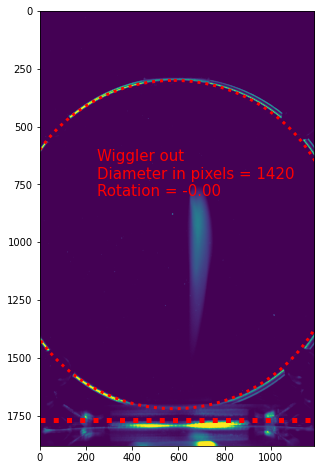

rotation for DYG14 is 0.7
for DYG13 it is -0.5


In [9]:
# Find the YAG image in pixels
i = 1  # Shot number
print('shot', i)
rotation = -0.0
fn = '/home/arnau/documents/ETHZ/MScThesis/experiment_data/' + 'DYG13_TDC=on_spect=off/21-08/case1/wig_in/DYG13_TDCon_yFocusing_Blackfly/Imag_raw_Shot_0{:02d}.rimg'.format(i)
M = pmf.getM(fn, crop = [0.01, 0.999, 0.01, 0.99], rot = rotation)

fig, ax = plt.subplots(figsize = (10,8))
ax.imshow(M)
ax.text(250, 800, 
        'Wiggler out\nDiameter in pixels = {:02d}\nRotation = {:.2f}'.format(Ldyg13, rotation), color = 'red', fontsize = 15)

ax.axhline(1770, lw = 5, color = 'red', ls = ':')  # To calibrate screen rotation
ax.add_patch(Ellipse((580, 1010), Ldyg13, Ldyg13, color = 'red', linewidth = 3, fill = 0, ls = ":"))
plt.show()

print('rotation for DYG14 is 0.7')
print('for DYG13 it is -0.5')

In [10]:
## Charge scan
fn = '/home/arnau/documents/ETHZ/MScThesis/experiment_data/' + 'DYG13_TDC=on_spect=off/21-08/case1/wig_in/DYG13_TDCon_yFocusing_LeCroy/'
best_cases = []

charge_scan = np.zeros(50)
for k in range(50):
    charge = pmf.integrateCharge(fn + 'ICT_raw_Shot_0{:02d}.rict'.format(k)) * 1e12
    dQloc = np.abs(charge + 300)
    charge_scan[k] = charge
    if dQloc < dQ:
        print('case', k, 'has',  charge, 'pC')
        best_cases.append(k)
df = pd.DataFrame(charge_scan, columns = ['Charge [pC]'])
df.to_csv(fn + '/charge_summary.tsv', sep = '\t', index = True, mode = 'w')

case 1 has -305.62686666250744 pC
case 5 has -293.1189049406118 pC
case 13 has -294.23545219420834 pC
case 14 has -299.1240908169633 pC
case 15 has -302.5554233717667 pC
case 21 has -296.3166454404415 pC
case 27 has -306.99508105151443 pC
case 31 has -301.14329615396395 pC
case 40 has -294.1639654649594 pC



wig out shot number 1
opening /home/arnau/documents/ETHZ/MScThesis/experiment_data/DYG13_TDC=on_spect=off/21-08/case1/wig_in/DYG13_TDCon_yFocusing_Blackfly/Imag_raw_Shot_001.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -305.63 pC

wig out shot number 5
opening /home/arnau/documents/ETHZ/MScThesis/experiment_data/DYG13_TDC=on_spect=off/21-08/case1/wig_in/DYG13_TDCon_yFocusing_Blackfly/Imag_raw_Shot_005.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -293.12 pC

wig out shot number 13
opening /home/arnau/documents/ETHZ/MScThesis/experiment_data/DYG13_TDC=on_spect=off/21-08/case1/wig_in/DYG13_TDCon_yFocusing_Blackfly/Imag_raw_Shot_013.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -294.24 pC

wig out shot number 14
opening /home/arnau/documents/ETHZ/MScThesis/experiment_data/DYG13_TDC=on_spect=off/21-08/case1/wig_in/DYG13_TDCon_yFocusing_Blackfly/Imag_raw_Shot_014.rimg

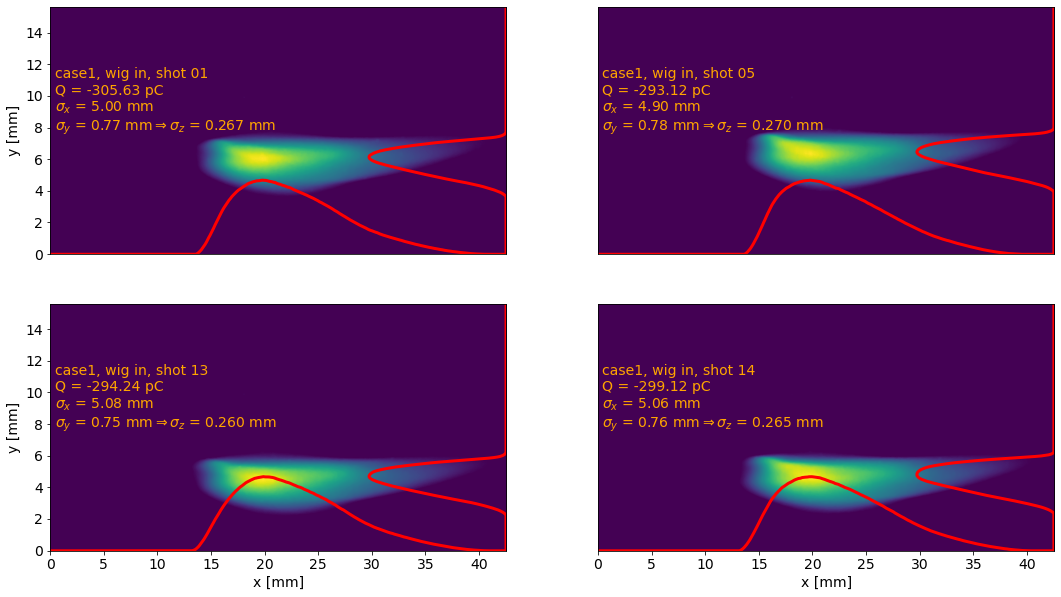

In [14]:
fn = '/home/arnau/documents/ETHZ/MScThesis/experiment_data/' + 'DYG13_TDC=on_spect=off/21-08/case1/wig_in/DYG13_TDCon_yFocusing_Blackfly/'

Lreal = 50  # in mm, Yag size
maxHH = 0.3
TDC = 2.872  # TDC factor

Ms = []
Qs = []

fig, ax = plt.subplots(2,2, figsize = (18, 10))
ax = ax.reshape(-1)
for i,shot in enumerate(best_cases[:4]):
    print('\nwig out shot number', shot)
    Mout = pmf.getM(fn + 'Imag_raw_Shot_0{:02d}.rimg'.format(shot), 
                crop = [.35,.72,.2,.83], rot = rotation, size_filter = 8)
    Mout = Mout.T
    Ms.append(Mout)
    extent = np.array([-0.5, Mout.shape[1] - 0.5, -0.5, Mout.shape[0] - 0.5])
    extent *= Lreal/ Ldyg13

    ax[i].imshow(Mout, extent = extent, aspect = 'auto')
    ax[i].tick_params(axis = 'both', labelsize = fs)
    # Plot histograms and get FWHM, rms and charge
    [x,hist] = pmf.histAx2(ax[i], M = Mout, axis = 0, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
    rmsx = pmf.getRms(x, hist)
    laterx = [x,hist]
    [x,hist] = pmf.histAx2(ax[i], M = Mout, axis = 1, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
    rmsy = pmf.getRms(x, hist)
    latery = [x,hist]
    charge = pmf.integrateCharge(fn + '../DYG13_TDCon_yFocusing_LeCroy/ICT_raw_Shot_0{:02d}.rict'.format(shot)) * 1e12
    Qs.append(charge)
    print('charge = {:.2f} pC'.format(charge))
    # Text with info
    ax[i].text(.01, .5, 'case1, wig in, shot {:02d}\n'.format(shot) +
               'Q = {:.2f} pC\n'.format(charge) + 
               '$\sigma_x$ = {:.2f} mm\n'.format(rmsx) +
               '$\sigma_y$ = {:.2f} mm'.format(rmsy) +
               '$\Rightarrow\sigma_z$ = {:.3f} mm'.format(rmsy/TDC),
               fontsize = fs, color = 'orange', transform = ax[i].transAxes)

# Adjust axes to have same scale
pmf.adjust_axes_limits(ax, 'x')
pmf.adjust_axes_limits(ax, 'y')

# Add axis labels when necessary
ax[0].set_ylabel('y [mm]', fontsize = fs)
ax[2].set_ylabel('y [mm]', fontsize = fs)
ax[2].set_xlabel('x [mm]', fontsize = fs)
ax[3].set_xlabel('x [mm]', fontsize = fs)
ax[1].tick_params(axis = 'y', labelsize = fs)
ax[2].tick_params(axis = 'x', labelsize = fs)
ax[0].set_xticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[3].set_yticks([])

plt.show()

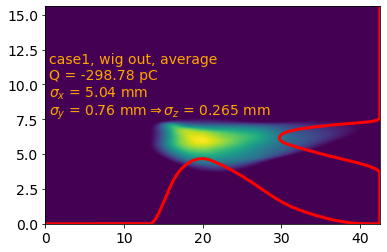

In [15]:
[M,Q] = pmf.average_matrix(Ms, Qs)
extent = np.array([-0.5, M.shape[1] - 0.5, -0.5, M.shape[0] - 0.5])
extent *= Lreal/ Ldyg13

fig,ax = plt.subplots()
ax.imshow(M, extent = extent, aspect = 'auto')
ax.tick_params(axis = 'both', labelsize = fs)
# Plot histograms and get FWHM, rms and charge
[x,hist] = pmf.histAx2(ax, M = M, axis = 0, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
rmsx = pmf.getRms(x, hist)
[x,hist] = pmf.histAx2(ax, M = M, axis = 1, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
rmsy = pmf.getRms(x, hist)

pmf.save_matrix(M, extent, pltpath + '/average_case1_wigIn_TDCon.txt')
# Text with info
ax.text(.01, .5, 'case1, wig out, average\n' +
           'Q = {:.2f} pC\n'.format(Q) + 
           '$\sigma_x$ = {:.2f} mm\n'.format(rmsx) +
           '$\sigma_y$ = {:.2f} mm'.format(rmsy)+
           '$\Rightarrow\sigma_z$ = {:.3f} mm'.format(rmsy/TDC),
           fontsize = fs, color = 'orange', transform = ax.transAxes)
plt.show()

# DY14, TDC off, spect on

## Wiggler out

shot 1
opening /home/arnau/documents/ETHZ/MScThesis/experiment_data/DYG14_TDC=off_spect=on/21-08/case1/wig_out/DYG14_noTDC_xFocusing_Blackfly/Imag_raw_Shot_001.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)


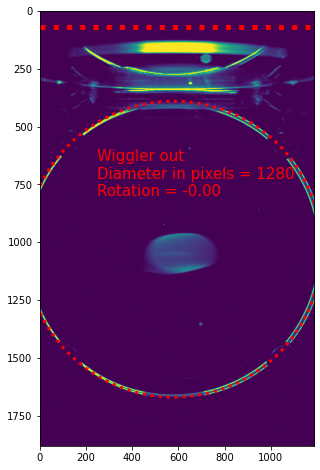

rotation for DYG14 is 0.7
for DYG13 it is -0.5


In [30]:
# Find the YAG image in pixels
i = 1  # Shot number
print('shot', i)
rotation = -0.0
fn = '/home/arnau/documents/ETHZ/MScThesis/experiment_data/' + 'DYG14_TDC=off_spect=on/21-08/case1/wig_out/DYG14_noTDC_xFocusing_Blackfly/Imag_raw_Shot_0{:02d}.rimg'.format(i)
M = pmf.getM(fn, crop = [0.01, 0.999, 0.01, 0.99], rot = rotation)

Ldyg14 = 1280
fig, ax = plt.subplots(figsize = (10,8))
ax.imshow(M)
ax.text(250, 800, 
        'Wiggler out\nDiameter in pixels = {:02d}\nRotation = {:.2f}'.format(Ldyg14, rotation), color = 'red', fontsize = 15)

ax.axhline(70, lw = 5, color = 'red', ls = ':')  # To calibrate screen rotation
ax.add_patch(Ellipse((580, 1030), Ldyg14, Ldyg14, color = 'red', linewidth = 3, fill = 0, ls = ":"))
plt.show()

print('rotation for DYG14 is 0.7')
print('for DYG13 it is -0.5')

In [31]:
## Charge scan
fn = '/home/arnau/documents/ETHZ/MScThesis/experiment_data/' + 'DYG14_TDC=off_spect=on/21-08/case1/wig_out/DYG14_noTDC_xFocusing_LeCroy/'
best_cases = []
Qs = []

charge_scan = np.zeros(50)
for k in range(50):
    charge = pmf.integrateCharge(fn + 'ICT_raw_Shot_0{:02d}.rict'.format(k)) * 1e12
    dQloc = np.abs(charge + 300)
    charge_scan[k] = charge
    if dQloc < dQ:
        print('case', k, 'has',  charge, 'pC')
        best_cases.append(k)
        Qs.append(charge)
df = pd.DataFrame(charge_scan, columns = ['Charge [pC]'])
df.to_csv(fn + '/charge_summary.tsv', sep = '\t', index = True, mode = 'w')
best_cases, Qs = np.array(best_cases), np.array(Qs)
best_cases = np.take_along_axis(best_cases, np.argsort(np.abs(Qs+300), axis = 0), axis = 0)

case 8 has -286.4596933140572 pC
case 16 has -295.3840636019876 pC
case 18 has -294.7858708695526 pC
case 26 has -294.7883610779989 pC
case 38 has -313.33005655028995 pC
case 39 has -298.3426666613726 pC
case 46 has -286.87157519408026 pC
case 47 has -287.89125388627235 pC



wig out shot number 39
opening /home/arnau/documents/ETHZ/MScThesis/experiment_data/DYG14_TDC=off_spect=on/21-08/case1/wig_out/DYG14_noTDC_xFocusing_Blackfly/Imag_raw_Shot_039.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -298.34 pC

wig out shot number 16
opening /home/arnau/documents/ETHZ/MScThesis/experiment_data/DYG14_TDC=off_spect=on/21-08/case1/wig_out/DYG14_noTDC_xFocusing_Blackfly/Imag_raw_Shot_016.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -295.38 pC

wig out shot number 26
opening /home/arnau/documents/ETHZ/MScThesis/experiment_data/DYG14_TDC=off_spect=on/21-08/case1/wig_out/DYG14_noTDC_xFocusing_Blackfly/Imag_raw_Shot_026.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -294.79 pC

wig out shot number 18
opening /home/arnau/documents/ETHZ/MScThesis/experiment_data/DYG14_TDC=off_spect=on/21-08/case1/wig_out/DYG14_noTDC_xFocusing_Blackfly/Imag_raw_Shot_01

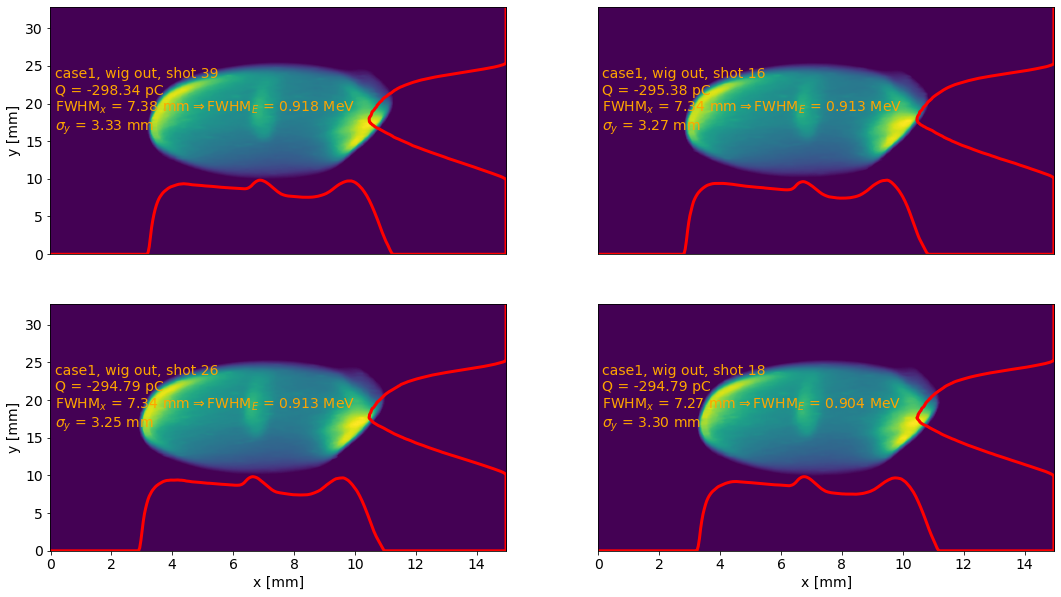

In [32]:
fn = '/home/arnau/documents/ETHZ/MScThesis/experiment_data/' + 'DYG14_TDC=off_spect=on/21-08/case1/wig_out/DYG14_noTDC_xFocusing_Blackfly/'

Lreal = 50  # in mm, Yag size
spec = 0.365 * 1e3  # Spectrometer factor in mm
E = 45.4
maxHH = 0.3

Ms = []
Qs = []

fig, ax = plt.subplots(2,2, figsize = (18, 10))
ax = ax.reshape(-1)
for i,shot in enumerate(best_cases[:4]):
    print('\nwig out shot number', shot)
    Mout = pmf.getM(fn + 'Imag_raw_Shot_0{:02d}.rimg'.format(shot), 
                crop = [.2,.9,.47,.67], rot = rotation, size_filter = 8)
    Mout = Mout.T
    Ms.append(Mout)
    extent = np.array([-0.5, Mout.shape[1] - 0.5, -0.5, Mout.shape[0] - 0.5])
    extent *= Lreal/ Ldyg14

    ax[i].imshow(Mout, extent = extent, aspect = 'auto')
    ax[i].tick_params(axis = 'both', labelsize = fs)
    # Plot histograms and get FWHM, rms and charge
    [x,hist] = pmf.histAx2(ax[i], M = Mout, axis = 0, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
    [fwhmx,_] = pmf.getFWHM(x, hist)
    [x,hist] = pmf.histAx2(ax[i], M = Mout, axis = 1, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
    rmsy = pmf.getRms(x, hist)
    charge = pmf.integrateCharge(fn + '../DYG14_noTDC_xFocusing_LeCroy/ICT_raw_Shot_0{:02d}.rict'.format(shot)) * 1e12
    Qs.append(charge)
    print('charge = {:.2f} pC'.format(charge))
    # Text with info
    ax[i].text(.01, .5, 'case1, wig out, shot {:02d}\n'.format(shot) +
               'Q = {:.2f} pC\n'.format(charge) + 
               'FWHM$_x$ = {:.2f} mm'.format(fwhmx) +
               '$\Rightarrow$FWHM$_E$ = {:.3f} MeV\n'.format(fwhmx/spec*E) +
               '$\sigma_y$ = {:.2f} mm'.format(rmsy),
               fontsize = fs, color = 'orange', transform = ax[i].transAxes)

# Adjust axes to have same scale
pmf.adjust_axes_limits(ax, 'x')
pmf.adjust_axes_limits(ax, 'y')

# Add axis labels when necessary
ax[0].set_ylabel('y [mm]', fontsize = fs)
ax[2].set_ylabel('y [mm]', fontsize = fs)
ax[2].set_xlabel('x [mm]', fontsize = fs)
ax[3].set_xlabel('x [mm]', fontsize = fs)
ax[1].tick_params(axis = 'y', labelsize = fs)
ax[2].tick_params(axis = 'x', labelsize = fs)
ax[0].set_xticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[3].set_yticks([])

plt.show()

384 and (384, 840)
Removing peak at index 205


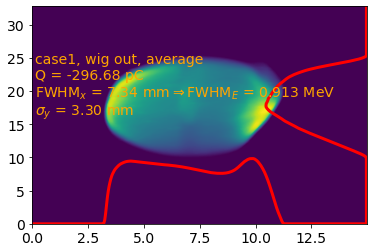

In [33]:
[M,Q] = pmf.average_matrix(Ms, Qs)
extent = np.array([-0.5, M.shape[1] - 0.5, -0.5, M.shape[0] - 0.5])
extent *= Lreal/ Ldyg14
[M,_] = pmf.remove_bump(M, axis = 0, plot = False)

fig,ax = plt.subplots()
ax.imshow(M, extent = extent, aspect = 'auto')
ax.tick_params(axis = 'both', labelsize = fs)
# Plot histograms and get FWHM, rms and charge
[x,hist] = pmf.histAx2(ax, M = M, axis = 0, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
[fwhmx,_] = pmf.getFWHM(x, hist)
[x,hist] = pmf.histAx2(ax, M = M, axis = 1, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
rmsy = pmf.getRms(x, hist)

pmf.save_matrix(M, extent, pltpath + '/average_case1_wigOut_specton.txt')

# Text with info
ax.text(.01, .5, 'case1, wig out, average\n' +
           'Q = {:.2f} pC\n'.format(Q) + 
           'FWHM$_x$ = {:.2f} mm'.format(fwhmx) +
           '$\Rightarrow$FWHM$_E$ = {:.3f} MeV\n'.format(fwhmx/spec*E) +
           '$\sigma_y$ = {:.2f} mm'.format(rmsy),
           fontsize = fs, color = 'orange', transform = ax.transAxes)
plt.show()

## Wiggler in

shot 1
opening /home/arnau/documents/ETHZ/MScThesis/experiment_data/DYG14_TDC=off_spect=on/21-08/case1/wig_in/DYG14_noTDC_xFocusing_Blackfly/Imag_raw_Shot_001.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)


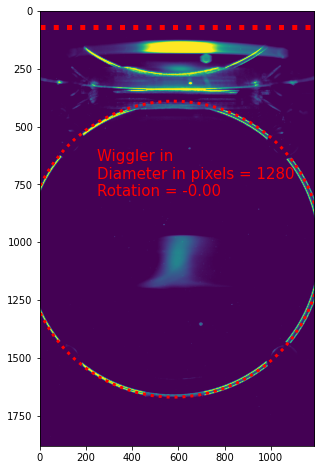

rotation for DYG14 is 0.7
for DYG13 it is -0.5


In [36]:
# Find the YAG image in pixels
i = 1  # Shot number
print('shot', i)
rotation = -0.0
fn = '/home/arnau/documents/ETHZ/MScThesis/experiment_data/' + 'DYG14_TDC=off_spect=on/21-08/case1/wig_in/DYG14_noTDC_xFocusing_Blackfly/Imag_raw_Shot_0{:02d}.rimg'.format(i)
M = pmf.getM(fn, crop = [0.01, 0.999, 0.01, 0.99], rot = rotation)

fig, ax = plt.subplots(figsize = (10,8))
ax.imshow(M)
ax.text(250, 800, 
        'Wiggler in\nDiameter in pixels = {:02d}\nRotation = {:.2f}'.format(Ldyg14, rotation), color = 'red', fontsize = 15)

ax.axhline(70, lw = 5, color = 'red', ls = ':')  # To calibrate screen rotation
ax.add_patch(Ellipse((580, 1030), Ldyg14, Ldyg14, color = 'red', linewidth = 3, fill = 0, ls = ":"))
plt.show()

print('rotation for DYG14 is 0.7')
print('for DYG13 it is -0.5')

In [37]:
## Charge scan
fn = '/home/arnau/documents/ETHZ/MScThesis/experiment_data/' + 'DYG14_TDC=off_spect=on/21-08/case1/wig_in/DYG14_noTDC_xFocusing_LeCroy/'
best_cases = []
Qs = []

charge_scan = np.zeros(50)
for k in range(50):
    charge = pmf.integrateCharge(fn + 'ICT_raw_Shot_0{:02d}.rict'.format(k)) * 1e12
    dQloc = np.abs(charge + 300)
    charge_scan[k] = charge
    if dQloc < dQ:
        print('case', k, 'has',  charge, 'pC')
        best_cases.append(k)
        Qs.append(charge)
df = pd.DataFrame(charge_scan, columns = ['Charge [pC]'])
df.to_csv(fn + '/charge_summary.tsv', sep = '\t', index = True, mode = 'w')
best_cases, Qs = np.array(best_cases), np.array(Qs)
best_cases = np.take_along_axis(best_cases, np.argsort(np.abs(Qs+300), axis = 0), axis = 0)

case 7 has -290.0952036261299 pC
case 8 has -301.5201011510002 pC
case 10 has -294.0691617459372 pC
case 11 has -309.002292494541 pC
case 14 has -300.6634812837649 pC
case 15 has -307.10086215333655 pC
case 18 has -303.8465932826466 pC
case 25 has -296.8162037943155 pC
case 26 has -293.1928723578107 pC
case 30 has -299.91717079913604 pC
case 38 has -302.1972912731176 pC
case 39 has -297.3757634124272 pC
case 45 has -298.15760896352 pC
case 48 has -298.97555744187997 pC



wig out shot number 30
opening /home/arnau/documents/ETHZ/MScThesis/experiment_data/DYG14_TDC=off_spect=on/21-08/case1/wig_in/DYG14_noTDC_xFocusing_Blackfly/Imag_raw_Shot_030.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -299.92 pC

wig out shot number 14
opening /home/arnau/documents/ETHZ/MScThesis/experiment_data/DYG14_TDC=off_spect=on/21-08/case1/wig_in/DYG14_noTDC_xFocusing_Blackfly/Imag_raw_Shot_014.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -300.66 pC

wig out shot number 48
opening /home/arnau/documents/ETHZ/MScThesis/experiment_data/DYG14_TDC=off_spect=on/21-08/case1/wig_in/DYG14_noTDC_xFocusing_Blackfly/Imag_raw_Shot_048.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -298.98 pC

wig out shot number 8
opening /home/arnau/documents/ETHZ/MScThesis/experiment_data/DYG14_TDC=off_spect=on/21-08/case1/wig_in/DYG14_noTDC_xFocusing_Blackfly/Imag_raw_Shot_008.rim

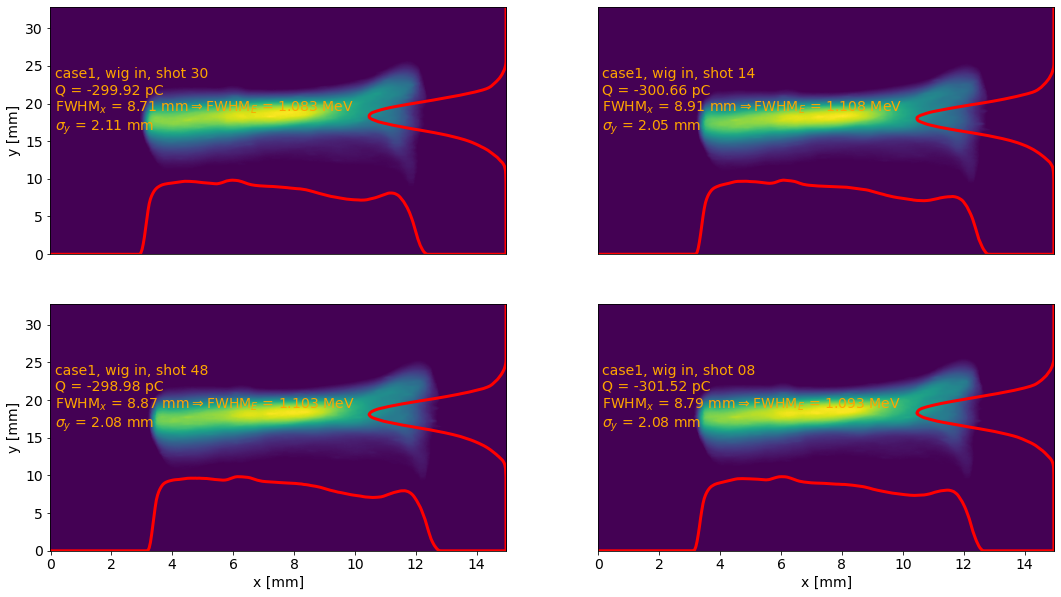

In [38]:
fn = '/home/arnau/documents/ETHZ/MScThesis/experiment_data/' + 'DYG14_TDC=off_spect=on/21-08/case1/wig_in/DYG14_noTDC_xFocusing_Blackfly/'

Lreal = 50  # in mm, Yag size
maxHH = 0.3

Ms = []
Qs = []

fig, ax = plt.subplots(2,2, figsize = (18, 10))
ax = ax.reshape(-1)
for i,shot in enumerate(best_cases[:4]):
    print('\nwig out shot number', shot)
    Mout = pmf.getM(fn + 'Imag_raw_Shot_0{:02d}.rimg'.format(shot), 
                crop = [.2,.9,.47,.67], rot = rotation, size_filter = 8)
    Mout = Mout.T
    Ms.append(Mout)
    extent = np.array([-0.5, Mout.shape[1] - 0.5, -0.5, Mout.shape[0] - 0.5])
    extent *= Lreal/ Ldyg14

    ax[i].imshow(Mout, extent = extent, aspect = 'auto')
    ax[i].tick_params(axis = 'both', labelsize = fs)
    # Plot histograms and get FWHM, rms and charge
    [x,hist] = pmf.histAx2(ax[i], M = Mout, axis = 0, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
    [fwhmx,_] = pmf.getFWHM(x, hist)
    [x,hist] = pmf.histAx2(ax[i], M = Mout, axis = 1, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
    rmsy = pmf.getRms(x, hist)
    charge = pmf.integrateCharge(fn + '../DYG14_noTDC_xFocusing_LeCroy/ICT_raw_Shot_0{:02d}.rict'.format(shot)) * 1e12
    Qs.append(charge)
    print('charge = {:.2f} pC'.format(charge))
    # Text with info
    ax[i].text(.01, .5, 'case1, wig in, shot {:02d}\n'.format(shot) +
               'Q = {:.2f} pC\n'.format(charge) + 
               'FWHM$_x$ = {:.2f} mm'.format(fwhmx) +
               '$\Rightarrow$FWHM$_E$ = {:.3f} MeV\n'.format(fwhmx/spec*E) +
               '$\sigma_y$ = {:.2f} mm'.format(rmsy),
               fontsize = fs, color = 'orange', transform = ax[i].transAxes)

# Adjust axes to have same scale
pmf.adjust_axes_limits(ax, 'x')
pmf.adjust_axes_limits(ax, 'y')

# Add axis labels when necessary
ax[0].set_ylabel('y [mm]', fontsize = fs)
ax[2].set_ylabel('y [mm]', fontsize = fs)
ax[2].set_xlabel('x [mm]', fontsize = fs)
ax[3].set_xlabel('x [mm]', fontsize = fs)
ax[1].tick_params(axis = 'y', labelsize = fs)
ax[2].tick_params(axis = 'x', labelsize = fs)
ax[0].set_xticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[3].set_yticks([])

plt.show()

384 and (384, 840)
Removing peak at index 230


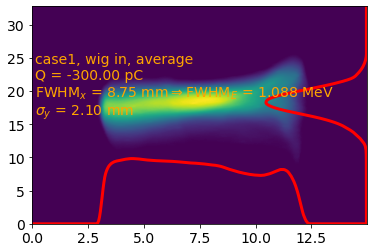

In [39]:
[M,Q] = pmf.average_matrix(Ms, Qs)
extent = np.array([-0.5, M.shape[1] - 0.5, -0.5, M.shape[0] - 0.5])
extent *= Lreal/ Ldyg14
[M,_] = pmf.remove_bump(M, axis = 0, plot = False)

fig,ax = plt.subplots()
ax.imshow(M, extent = extent, aspect = 'auto')
ax.tick_params(axis = 'both', labelsize = fs)
# Plot histograms and get FWHM, rms and charge
[x,hist] = pmf.histAx2(ax, M = M, axis = 0, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
[fwhmx,_] = pmf.getFWHM(x, hist)
[x,hist] = pmf.histAx2(ax, M = M, axis = 1, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
rmsy = pmf.getRms(x, hist)

pmf.save_matrix(M, extent, pltpath + '/average_case1_wigIn_specton.txt')

# Text with info
ax.text(.01, .5, 'case1, wig in, average\n' +
           'Q = {:.2f} pC\n'.format(Q) + 
           'FWHM$_x$ = {:.2f} mm'.format(fwhmx) +
           '$\Rightarrow$FWHM$_E$ = {:.3f} MeV\n'.format(fwhmx/spec*E) +
           '$\sigma_y$ = {:.2f} mm'.format(rmsy),
           fontsize = fs, color = 'orange', transform = ax.transAxes)
plt.show()

# DY14 LPS, TDC on, spect on

## Wiggler out

shot 1
opening /home/arnau/documents/ETHZ/MScThesis/experiment_data/DYG14_LPS/21-08/case1/wig_out/DYG14_LPS_Blackfly/Imag_raw_Shot_001.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)


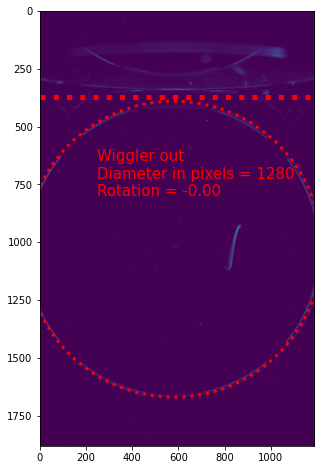

rotation for DYG14 is 0.7
for DYG13 it is -0.5


In [40]:
# Find the YAG image in pixels
i = 1  # Shot number
print('shot', i)
rotation = -0.0
fn = '/home/arnau/documents/ETHZ/MScThesis/experiment_data/' + 'DYG14_LPS/21-08/case1/wig_out/DYG14_LPS_Blackfly/Imag_raw_Shot_0{:02d}.rimg'.format(i)
M = pmf.getM(fn, crop = [0.01, 0.999, 0.01, 0.99], rot = rotation)

fig, ax = plt.subplots(figsize = (10,8))
ax.imshow(M)
ax.text(250, 800, 
        'Wiggler out\nDiameter in pixels = {:02d}\nRotation = {:.2f}'.format(Ldyg14, rotation), color = 'red', fontsize = 15)

ax.axhline(370, lw = 5, color = 'red', ls = ':')  # To calibrate screen rotation
ax.add_patch(Ellipse((580, 1030), Ldyg14, Ldyg14, color = 'red', linewidth = 3, fill = 0, ls = ":"))
plt.show()

print('rotation for DYG14 is 0.7')
print('for DYG13 it is -0.5')

In [41]:
## Charge scan
fn = '/home/arnau/documents/ETHZ/MScThesis/experiment_data/' + 'DYG14_LPS/21-08/case1/wig_out/DYG14_LPS_LeCroy/'
best_cases = []
Qs = []

charge_scan = np.zeros(50)
for k in range(50):
    charge = pmf.integrateCharge(fn + 'ICT_raw_Shot_0{:02d}.rict'.format(k)) * 1e12
    dQloc = np.abs(charge + 300)
    charge_scan[k] = charge
    if dQloc < dQ:
        print('case', k, 'has',  charge, 'pC')
        best_cases.append(k)
        Qs.append(charge)
df = pd.DataFrame(charge_scan, columns = ['Charge [pC]'])
df.to_csv(fn + '/charge_summary.tsv', sep = '\t', index = True, mode = 'w')

best_cases, Qs = np.array(best_cases), np.array(Qs)
best_cases = np.take_along_axis(best_cases, np.argsort(np.abs(Qs+300), axis = 0), axis = 0)

case 2 has -290.85902087139533 pC
case 27 has -299.8893457382898 pC
case 43 has -306.2606460093485 pC
case 47 has -297.0827581444943 pC



wig out shot number 27
opening /home/arnau/documents/ETHZ/MScThesis/experiment_data/DYG14_LPS/21-08/case1/wig_out/DYG14_LPS_Blackfly/Imag_raw_Shot_027.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -299.89 pC

wig out shot number 47
opening /home/arnau/documents/ETHZ/MScThesis/experiment_data/DYG14_LPS/21-08/case1/wig_out/DYG14_LPS_Blackfly/Imag_raw_Shot_047.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -297.08 pC

wig out shot number 43
opening /home/arnau/documents/ETHZ/MScThesis/experiment_data/DYG14_LPS/21-08/case1/wig_out/DYG14_LPS_Blackfly/Imag_raw_Shot_043.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -306.26 pC

wig out shot number 2
opening /home/arnau/documents/ETHZ/MScThesis/experiment_data/DYG14_LPS/21-08/case1/wig_out/DYG14_LPS_Blackfly/Imag_raw_Shot_002.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -290.86 pC


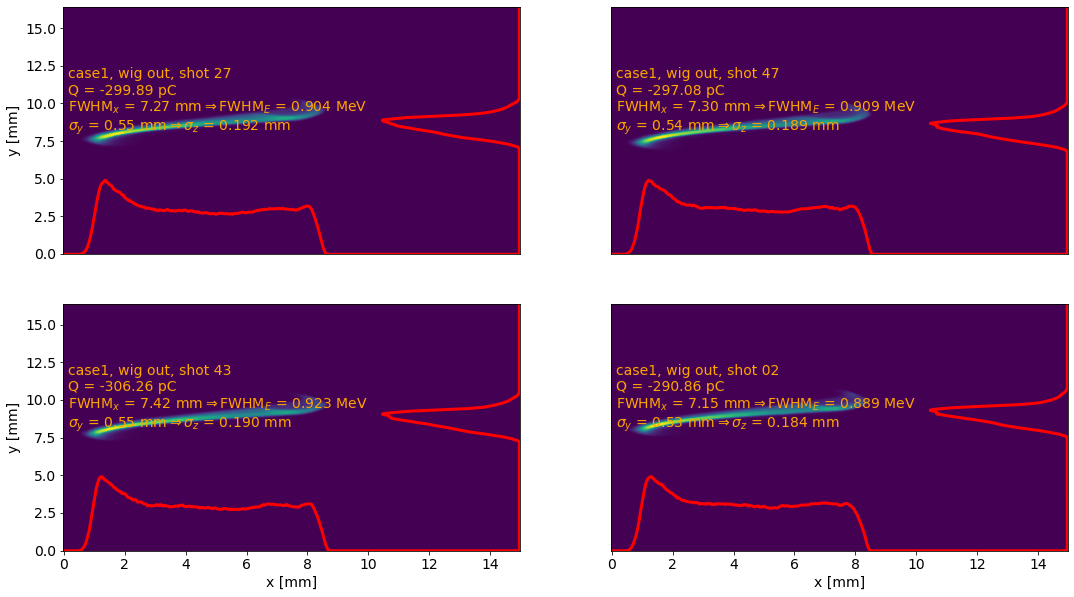

In [43]:
fn = '/home/arnau/documents/ETHZ/MScThesis/experiment_data/' + 'DYG14_LPS/21-08/case1/wig_out/DYG14_LPS_Blackfly/'

Lreal = 50  # in mm, Yag size
maxHH = 0.3

Ms = []
Qs = []

fig, ax = plt.subplots(2,2, figsize = (18, 10))
ax = ax.reshape(-1)
for i,shot in enumerate(best_cases[:4]):
    print('\nwig out shot number', shot)
    Mout = pmf.getM(fn + 'Imag_raw_Shot_0{:02d}.rimg'.format(shot), 
                crop = [.55,.9,.48,.68], rot = rotation, size_filter = 8)
    Mout = Mout.T
    Ms.append(Mout)
    extent = np.array([-0.5, Mout.shape[1] - 0.5, -0.5, Mout.shape[0] - 0.5])
    extent *= Lreal/ Ldyg14

    ax[i].imshow(Mout, extent = extent, aspect = 'auto')
    ax[i].tick_params(axis = 'both', labelsize = fs)
    # Plot histograms and get FWHM, rms and charge
    [x,hist] = pmf.histAx2(ax[i], M = Mout, axis = 0, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
    [fwhmx,_] = pmf.getFWHM(x, hist)
    [x,hist] = pmf.histAx2(ax[i], M = Mout, axis = 1, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
    rmsy = pmf.getRms(x, hist)
    charge = pmf.integrateCharge(fn + '../DYG14_LPS_LeCroy/ICT_raw_Shot_0{:02d}.rict'.format(shot)) * 1e12
    Qs.append(charge)
    print('charge = {:.2f} pC'.format(charge))
    # Text with info
    ax[i].text(.01, .5, 'case1, wig out, shot {:02d}\n'.format(shot) +
               'Q = {:.2f} pC\n'.format(charge) + 
               'FWHM$_x$ = {:.2f} mm'.format(fwhmx) +
               '$\Rightarrow$FWHM$_E$ = {:.3f} MeV\n'.format(fwhmx/spec*E) +
               '$\sigma_y$ = {:.2f} mm'.format(rmsy)+
               '$\Rightarrow\sigma_z$ = {:.3f} mm'.format(rmsy/TDC),
               fontsize = fs, color = 'orange', transform = ax[i].transAxes)

# Adjust axes to have same scale
pmf.adjust_axes_limits(ax, 'x')
pmf.adjust_axes_limits(ax, 'y')

# Add axis labels when necessary
ax[0].set_ylabel('y [mm]', fontsize = fs)
ax[2].set_ylabel('y [mm]', fontsize = fs)
ax[2].set_xlabel('x [mm]', fontsize = fs)
ax[3].set_xlabel('x [mm]', fontsize = fs)
ax[1].tick_params(axis = 'y', labelsize = fs)
ax[2].tick_params(axis = 'x', labelsize = fs)
ax[0].set_xticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[3].set_yticks([])

plt.show()

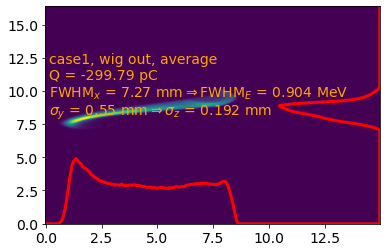

In [44]:
[M,Q] = pmf.average_matrix(Ms, Qs)
extent = np.array([-0.5, M.shape[1] - 0.5, -0.5, M.shape[0] - 0.5])
extent *= Lreal/ Ldyg14

fig,ax = plt.subplots()
ax.imshow(M, extent = extent, aspect = 'auto')
ax.tick_params(axis = 'both', labelsize = fs)
# Plot histograms and get FWHM, rms and charge
[x,hist] = pmf.histAx2(ax, M = M, axis = 0, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
[fwhmx,_] = pmf.getFWHM(x, hist, denom = 2.)
[x,hist] = pmf.histAx2(ax, M = M, axis = 1, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
rmsy = pmf.getRms(x, hist)

pmf.save_matrix(M, extent, pltpath + '/average_case1_wigOut_LPS.txt')

# Text with info
ax.text(.01, .5, 'case1, wig out, average\n' +
           'Q = {:.2f} pC\n'.format(Q) + 
           'FWHM$_x$ = {:.2f} mm'.format(fwhmx) +
           '$\Rightarrow$FWHM$_E$ = {:.3f} MeV\n'.format(fwhmx/spec*E) +
           '$\sigma_y$ = {:.2f} mm'.format(rmsy)+
           '$\Rightarrow\sigma_z$ = {:.3f} mm'.format(rmsy/TDC),
           fontsize = fs, color = 'orange', transform = ax.transAxes)
plt.show()

## Wiggler in

shot 1
opening /home/arnau/documents/ETHZ/MScThesis/experiment_data/DYG14_LPS/21-08/case1/wig_in/DYG14_LPS_Blackfly/Imag_raw_Shot_001.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)


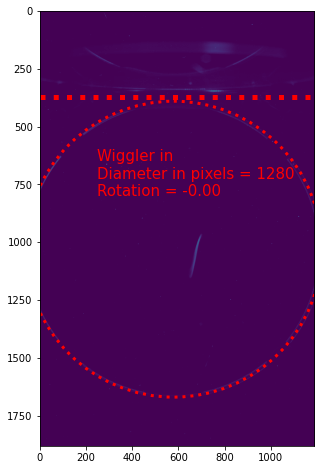

rotation for DYG14 is 0.7
for DYG13 it is -0.5


In [45]:
# Find the YAG image in pixels
i = 1  # Shot number
print('shot', i)
rotation = -0.0
fn = '/home/arnau/documents/ETHZ/MScThesis/experiment_data/' + 'DYG14_LPS/21-08/case1/wig_in/DYG14_LPS_Blackfly/Imag_raw_Shot_0{:02d}.rimg'.format(i)
M = pmf.getM(fn, crop = [0.01, 0.999, 0.01, 0.99], rot = rotation)

fig, ax = plt.subplots(figsize = (10,8))
ax.imshow(M)
ax.text(250, 800, 
        'Wiggler in\nDiameter in pixels = {:02d}\nRotation = {:.2f}'.format(Ldyg14, rotation), color = 'red', fontsize = 15)

ax.axhline(370, lw = 5, color = 'red', ls = ':')  # To calibrate screen rotation
ax.add_patch(Ellipse((580, 1030), Ldyg14, Ldyg14, color = 'red', linewidth = 3, fill = 0, ls = ":"))
plt.show()

print('rotation for DYG14 is 0.7')
print('for DYG13 it is -0.5')

In [46]:
## Charge scan
fn = '/home/arnau/documents/ETHZ/MScThesis/experiment_data/' + 'DYG14_LPS/21-08/case1/wig_in/DYG14_LPS_LeCroy/'
best_cases = []
Qs = []

charge_scan = np.zeros(50)
for k in range(50):
    charge = pmf.integrateCharge(fn + 'ICT_raw_Shot_0{:02d}.rict'.format(k)) * 1e12
    dQloc = np.abs(charge + 300)
    charge_scan[k] = charge
    if dQloc < dQ:
        print('case', k, 'has',  charge, 'pC')
        best_cases.append(k)
        Qs.append(charge)
df = pd.DataFrame(charge_scan, columns = ['Charge [pC]'])
df.to_csv(fn + '/charge_summary.tsv', sep = '\t', index = True, mode = 'w')

best_cases, Qs = np.array(best_cases), np.array(Qs)
best_cases = np.take_along_axis(best_cases, np.argsort(np.abs(Qs+300), axis = 0), axis = 0)

case 21 has -300.95125455248956 pC
case 34 has -299.0459134514498 pC



wig out shot number 21
opening /home/arnau/documents/ETHZ/MScThesis/experiment_data/DYG14_LPS/21-08/case1/wig_in/DYG14_LPS_Blackfly/Imag_raw_Shot_021.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -300.95 pC

wig out shot number 34
opening /home/arnau/documents/ETHZ/MScThesis/experiment_data/DYG14_LPS/21-08/case1/wig_in/DYG14_LPS_Blackfly/Imag_raw_Shot_034.rimg
#y:1200 by x:1920 
shape after post-processing and cropping (1920, 1200)
charge = -299.05 pC


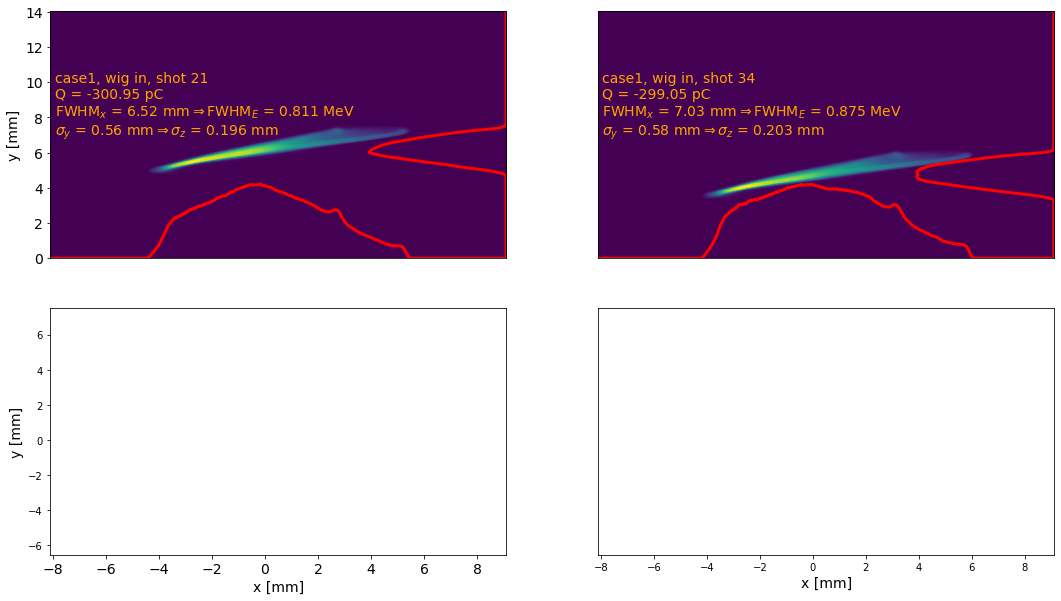

In [47]:
fn = '/home/arnau/documents/ETHZ/MScThesis/experiment_data/' + 'DYG14_LPS/21-08/case1/wig_in/DYG14_LPS_Blackfly/'

Lreal = 50  # in mm, Yag size
maxHH = 0.3

Ms = []
Qs = []

fig, ax = plt.subplots(2,2, figsize = (18, 10))
ax = ax.reshape(-1)
for i,shot in enumerate(best_cases[:4]):
    print('\nwig out shot number', shot)
    Mout = pmf.getM(fn + 'Imag_raw_Shot_0{:02d}.rimg'.format(shot), 
                crop = [.4,.7,.45,.68], rot = rotation, size_filter = 8)
    Mout = Mout.T
    Ms.append(Mout)
    extent = np.array([-0.5, Mout.shape[1] - 0.5, -0.5, Mout.shape[0] - 0.5])
    extent *= Lreal/ Ldyg14

    ax[i].imshow(Mout, extent = extent, aspect = 'auto')
    ax[i].tick_params(axis = 'both', labelsize = fs)
    # Plot histograms and get FWHM, rms and charge
    [x,hist] = pmf.histAx2(ax[i], M = Mout, axis = 0, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
    [fwhmx,_] = pmf.getFWHM(x, hist)
    [x,hist] = pmf.histAx2(ax[i], M = Mout, axis = 1, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
    rmsy = pmf.getRms(x, hist)
    charge = pmf.integrateCharge(fn + '../DYG14_LPS_LeCroy/ICT_raw_Shot_0{:02d}.rict'.format(shot)) * 1e12
    Qs.append(charge)
    print('charge = {:.2f} pC'.format(charge))
    # Text with info
    ax[i].text(.01, .5, 'case1, wig in, shot {:02d}\n'.format(shot) +
               'Q = {:.2f} pC\n'.format(charge) + 
               'FWHM$_x$ = {:.2f} mm'.format(fwhmx) +
               '$\Rightarrow$FWHM$_E$ = {:.3f} MeV\n'.format(fwhmx/spec*E) +
               '$\sigma_y$ = {:.2f} mm'.format(rmsy)+
               '$\Rightarrow\sigma_z$ = {:.3f} mm'.format(rmsy/TDC),
               fontsize = fs, color = 'orange', transform = ax[i].transAxes)

# Adjust axes to have same scale
pmf.adjust_axes_limits(ax, 'x')
pmf.adjust_axes_limits(ax, 'y')

# Add axis labels when necessary
ax[0].set_ylabel('y [mm]', fontsize = fs)
ax[2].set_ylabel('y [mm]', fontsize = fs)
ax[2].set_xlabel('x [mm]', fontsize = fs)
ax[3].set_xlabel('x [mm]', fontsize = fs)
ax[1].tick_params(axis = 'y', labelsize = fs)
ax[2].tick_params(axis = 'x', labelsize = fs)
ax[0].set_xticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[3].set_yticks([])

plt.show()

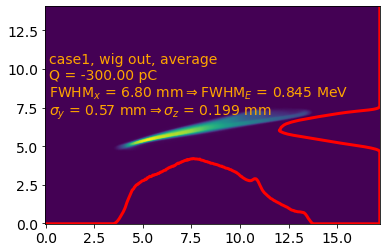

In [48]:
[M,Q] = pmf.average_matrix(Ms, Qs)
extent = np.array([-0.5, M.shape[1] - 0.5, -0.5, M.shape[0] - 0.5])
extent *= Lreal/ Ldyg14

fig,ax = plt.subplots()
ax.imshow(M, extent = extent, aspect = 'auto')
ax.tick_params(axis = 'both', labelsize = fs)
# Plot histograms and get FWHM, rms and charge
[x,hist] = pmf.histAx2(ax, M = M, axis = 0, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
[fwhmx,_] = pmf.getFWHM(x, hist, denom = 2.)
[x,hist] = pmf.histAx2(ax, M = M, axis = 1, xlims = extent, maxHH = maxHH, color = 'red', lw = 3)
rmsy = pmf.getRms(x, hist)

pmf.save_matrix(M, extent, pltpath + '/average_case1_wigIn_LPS.txt')

# Text with info
ax.text(.01, .5, 'case1, wig out, average\n' +
           'Q = {:.2f} pC\n'.format(Q) + 
           'FWHM$_x$ = {:.2f} mm'.format(fwhmx) +
           '$\Rightarrow$FWHM$_E$ = {:.3f} MeV\n'.format(fwhmx/spec*E) +
           '$\sigma_y$ = {:.2f} mm'.format(rmsy)+
           '$\Rightarrow\sigma_z$ = {:.3f} mm'.format(rmsy/TDC),
           fontsize = fs, color = 'orange', transform = ax.transAxes)
plt.show()

# Reconstruct bunch at DYG13

## Wiggler out

Getting LPS
Getting Spect only
Getting TDC only
Replacing the E distribution with the one from the spectrometer

 Interpolating...
generating particles...
0 particles have been generated
50000 particles have been generated
100000 particles have been generated
150000 particles have been generated
200000 particles have been generated
250000 particles have been generated
300000 particles have been generated
350000 particles have been generated
400000 particles have been generated
450000 particles have been generated
Finally we have 420400 particles


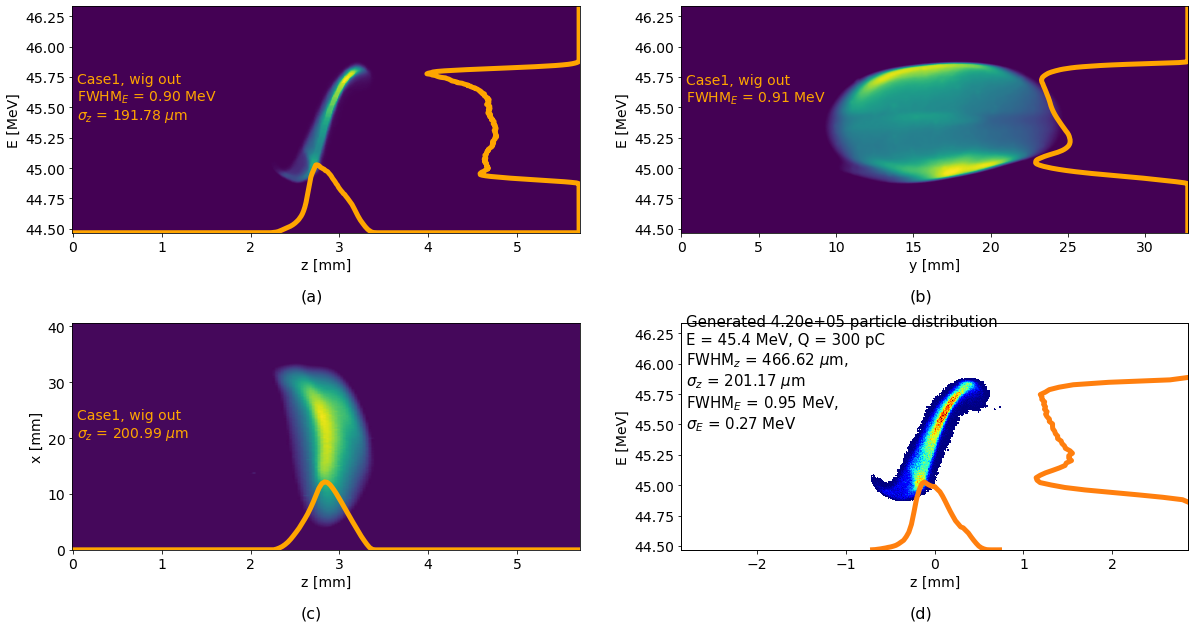

In [70]:
fig,axs = plt.subplots(2,2, figsize = (20,10))
fig.subplots_adjust(hspace=0.4)
    
pmf.sample_3Ms(axs, LPS_fn = pltpath + '/average_case1_wigOut_LPS.txt', 
           specton_fn = pltpath + '/average_case1_wigOut_specton.txt', 
          TDCon_fn = pltpath + '/average_case1_wigOut_TDCon.txt',
          out_fn = pltpath + '/case1_wigOut_LPS.tsv', Npart = 5*10**5,
          casename = 'Case1, wig out', show_info = True, plot_trafos = False, 
               sample = True, trafo_rms = False)
plt.savefig(pltpath + '/LPS_DYG14_case1_wigOut.png', bbox_inches = 'tight')
plt.show()


tests/sims_exp_August2021/long_drift_case1/wig.stat
gamma 87.78152212774603
Initial state
 [[ 7.44965149e-06 -1.25675145e-07  0.00000000e+00  0.00000000e+00]
 [-1.25675145e-07  1.96634101e-08  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  5.67070292e-07 -1.79533438e-07]
 [ 0.00000000e+00  0.00000000e+00 -1.79533438e-07  1.23617176e-07]]
Transfer matrix M
 [[1.   0.05 0.   0.  ]
 [0.   1.   0.   0.  ]
 [0.   0.   1.   0.05]
 [0.   0.   0.   1.  ]]
number of particles is 420400


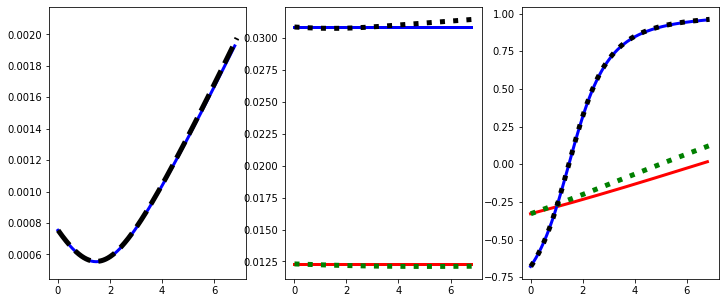

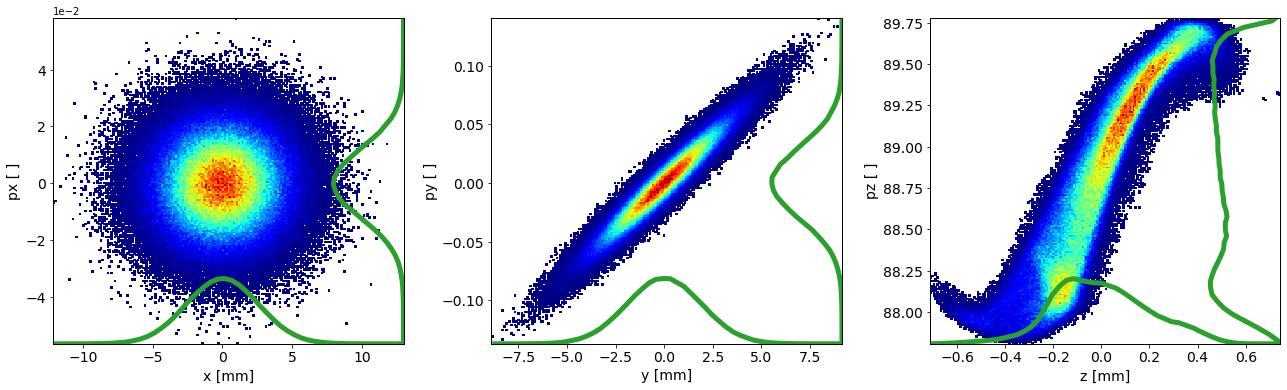


Saving particles in file...


In [71]:
trans = pmf.get_transverse_params('tests/sims_exp_August2021/long_drift_case1/wig.stat', 
                                  L = Ldr, l = 0.05, plot = True)
pmf.generate_transverse_phase_space(pltpath + '/case1_wigOut_LPS.tsv', trans, 
                                    'tests/sims_exp_Nov2021/backTrack_case1/Y14.dat',
                                    E = 45.4, plot = True, 
                                    plotFile = pltpath + '/distro_DYG14_case1_wigOut.png', 
                                    lw = 5, color = 2)

### Check that back-tracking worked correctly

tests/sims_exp_Nov2021/backTrack_case1/wig.stat
gamma 87.84121179729424
Initial state
 [[6.65929828e-06 6.82617474e-09 0.00000000e+00 0.00000000e+00]
 [6.82617474e-09 1.96357932e-08 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.68848063e-06 6.45738062e-07]
 [0.00000000e+00 0.00000000e+00 6.45738062e-07 1.23267655e-07]]
Transfer matrix M
 [[ 1.   -0.05  0.    0.  ]
 [ 0.    1.    0.    0.  ]
 [ 0.    0.    1.   -0.05]
 [ 0.    0.    0.    1.  ]]


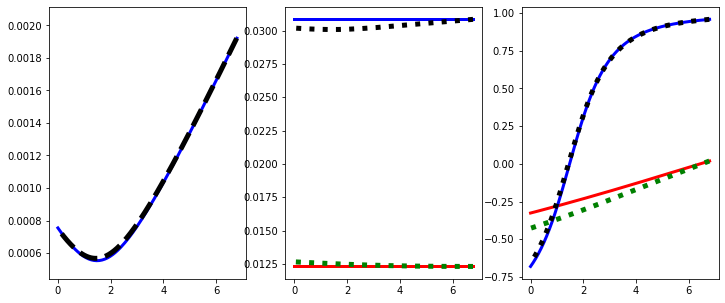

In [72]:
trans = pmf.get_transverse_params('tests/sims_exp_Nov2021/backTrack_case1/wig.stat', 
                              L = Ldr, l = -0.05, plot = True)


using tests/sims_exp_Nov2021/backTrack_case1
spos =  [0.]


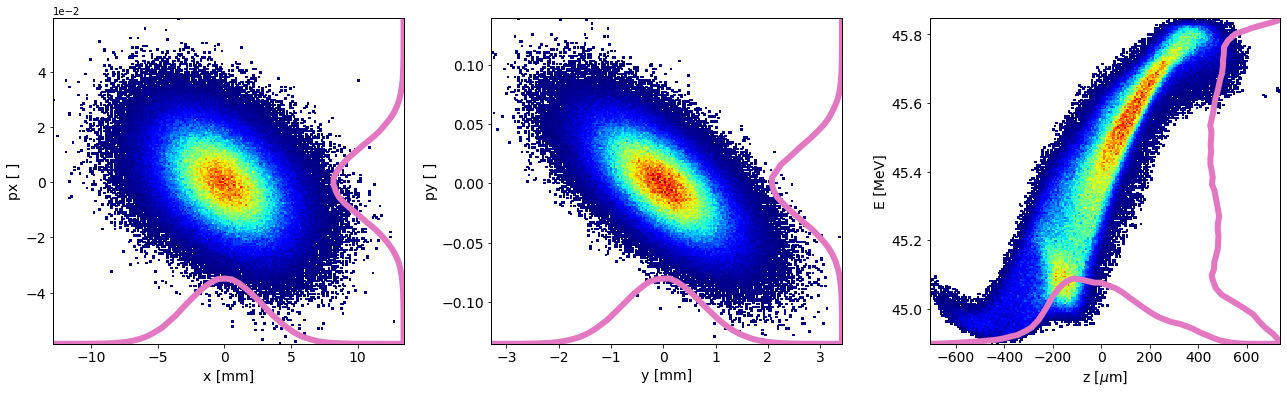

In [73]:
lw = 6
color = 6
plotFile = 'distro_PYG3_case1.png'

fn = 'tests/sims_exp_Nov2021/backTrack_case1'
print('using', fn)

h5p = H5Parser()
h5p.parse( fn + '/wig.h5', False)
dfloc = pd.DataFrame({'x':np.array(h5p.getStepDataset(dsetName = 'x', step = 0)),
                   'px':np.array(h5p.getStepDataset(dsetName = 'px', step = 0)),
                   'y':np.array(h5p.getStepDataset(dsetName = 'y', step = 0)),
                   'py':np.array(h5p.getStepDataset(dsetName = 'py', step = 0)),
                   'z':np.array(h5p.getStepDataset(dsetName = 'z', step = 0)),
                   'pz':np.array(h5p.getStepDataset(dsetName = 'pz', step = 0)),
                  })
print('spos = ', h5p.getStepAttribute('SPOS', step = 0))

fig,axs = plt.subplots(1, 3, figsize = (22,6))
fig.subplots_adjust(wspace=.25)
axs = axs.reshape(-1)

pmf.plotScreenXY(axs[0], dfloc['x'], dfloc['px'], ['x', 'px'], 
                 type = 'hist2d-hist', factors = [1e3, 1], 
                 nbins = 200, color = color, maxHH = .2, enable_cbar = 0, lw = lw)

pmf.plotScreenXY(axs[1], dfloc['y'], dfloc['py'], ['y', 'py'], 
                 type = 'hist2d-hist', factors = [1e3, 1], 
                 nbins = 200, color = color, maxHH = .2, enable_cbar = 0, lw = lw)
pmf.plotScreenXY(axs[2], dfloc['z']-np.mean(dfloc['z']), dfloc['pz']*.511*1e6, ['z', 'E'], 
                 type = 'hist2d-hist', factors = [1e6, 1e-6], 
                 nbins = 200, color = color, maxHH = .2, enable_cbar = 0, lw = lw)

for i in range(3):
    axs[i].tick_params(axis = 'both', labelsize = fs)

plt.savefig((pltpath + '/' + plotFile),bbox_inches='tight')
plt.show()

using directory tests/sims_exp_Nov2021/backTrack_case1
spos =  [0.]

Saving particles in file...


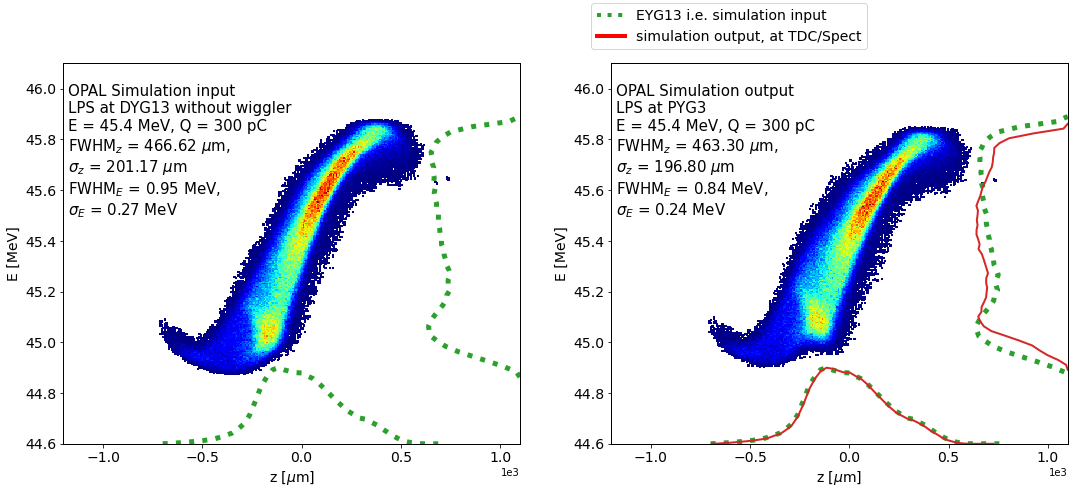

In [74]:
# LPS in backtracking sim

fig, ax = plt.subplots(1,2, figsize = (18, 7))
ax = ax.reshape(-1)
maxHH = 0.2

# Plot simulation input
qx = 'z'
qy = 'E'
fn = 'tests/sims_exp_Nov2021/backTrack_case1'
print('using directory', fn)
df = pd.read_csv(fn + '/Y14.dat', skiprows = 1, sep = r'\s+', names = ['x', 'px', 'y', 'py', 'z', 'pz'])
x = df['z']
y = np.array(df['px'])**2
y += np.array(df['py'])**2
y += np.array(df['pz'])**2
mc2 = .511 * 1e6
y = mc2 * np.sqrt(1 + y)
x -= np.mean(x)
[hist, bins] = np.histogram(x, bins = 50)
[FWHM,_] = pmf.getFWHM(bins[1:], hist, denom = 2)
FWHM *= 1e6
rms = pmf.getRms(bins[1:], hist) * 1e6
[hist, bins] = np.histogram(y, bins = 50)
[FWHME,_] = pmf.getFWHM(bins[1:], hist, denom = 2)
FWHME *= 1e-6
rmsE = pmf.getRms(bins[1:], hist) * 1e-6
avgE = np.mean(y) * 1e-6
pmf.plotScreenXY(ax[0], x, y, [qx, qy], type = 'hist2d-hist', factors = [1e6, 1e-6], nbins = 200, color = 12, maxHH = maxHH, enable_cbar = 0, lw = 5, ls = ':')
pmf.histAx(ax[1], x, axis = 0, bins = 50, maxHH = maxHH, ls = ':', lw = 5, color = 'C12', zorder = 5)
pmf.histAx(ax[1], y, axis = 1, bins = 50, maxHH = maxHH, flip = False, ls = ':', lw = 5, color = 'C12', zorder = 5)
# Text with info
ax[0].text(.01, .55, 'OPAL Simulation input \nLPS at DYG13 without wiggler\n' +
           'E = {:.1f} MeV, Q = 300 pC\n'.format(avgE) + 
           'FWHM$_z$ = {:.2f} $\mu$m,\n$\sigma_z$ = {:.2f} $\mu$m\n'.format(FWHM, rms) +
           'FWHM$_E$ = {:.2f} MeV,\n$\sigma_E$ = {:.2f} MeV\n'.format(FWHME, rmsE),
           fontsize = 15, color = 'black', transform = ax[0].transAxes)

# Plot final LPS of simulation
qx = 'z'
qy = 'E'
h5p = H5Parser()
h5p.parse( fn + '/wig.h5', False)
print('spos = ', h5p.getStepAttribute('SPOS', step = 0))
x = h5p.getStepDataset( dsetName = qx, step = 0)
y = np.array(h5p.getStepDataset( dsetName = 'px', step = 0))**2
y += np.array(h5p.getStepDataset( dsetName = 'py', step = 0))**2
y += np.array(h5p.getStepDataset( dsetName = 'pz', step = 0))**2
mc2 = .511 * 1e6
y = mc2 * np.sqrt(1 + y)
x -= np.mean(x)
[hist, bins] = np.histogram(x, bins = 50)
[FWHM,_] = pmf.getFWHM(bins[1:], hist, denom = 2)
FWHM *= 1e6
rms = pmf.getRms(bins[1:], hist) * 1e6
[hist, bins] = np.histogram(y, bins = 50)
[FWHME,_] = pmf.getFWHM(bins[1:], hist, denom = 2)
FWHME *= 1e-6
rmsE = pmf.getRms(bins[1:], hist) * 1e-6
avgE = np.mean(y) * 1e-6
###############################
# Store in csv
outFile = 'tests/sims_exp_Nov2021/case1_fromBackTrack/Y3.dat'
## Write particle number in first line
print('\nSaving particles in file...')
file = open(outFile, mode = 'w')
file.write(str(len(x)) + '\n')
file.close()
## Write the distribution
df = pd.DataFrame({'x':np.array(h5p.getStepDataset(dsetName = 'x', step = 0)),
                   'px':np.array(h5p.getStepDataset(dsetName = 'px', step = 0)),
                   'y':np.array(h5p.getStepDataset(dsetName = 'y', step = 0)),
                   'py':np.array(h5p.getStepDataset(dsetName = 'py', step = 0)),
                   'z':np.array(h5p.getStepDataset(dsetName = 'z', step = 0)),
                   'pz':np.array(h5p.getStepDataset(dsetName = 'pz', step = 0)),
                  })
df.to_csv(outFile, sep = '\t', header = False, index = False, mode = 'a')
###############################
pmf.plotScreenXY(ax[1], x, y, [qx, qy], type = 'hist2d-hist', factors = [1e6, 1e-6], nbins = 200, color = 3, maxHH = maxHH, enable_cbar = 0)
# Text with info
ax[1].text(.01, .55, 'OPAL Simulation output \nLPS at PYG3\n' +
           'E = {:.1f} MeV, Q = 300 pC\n'.format(avgE) + 
           'FWHM$_z$ = {:.2f} $\mu$m,\n$\sigma_z$ = {:.2f} $\mu$m\n'.format(FWHM, rms) +
           'FWHM$_E$ = {:.2f} MeV,\n$\sigma_E$ = {:.2f} MeV\n'.format(FWHME, rmsE),
           fontsize = 15, color = 'black', transform = ax[1].transAxes)


# Adjust limits
for axloc in ax:
    axloc.set_xlim([-1200, 1100])
    axloc.set_ylim([44.6,46.1])

# Custom legend
custom_lines = [Line2D([0], [0], color = 'C12', lw = 4, ls = ':'),
                Line2D([0], [0], color = 'red', lw = 4, ls = '-')]
fig.legend(custom_lines, ['EYG13 i.e. simulation input', 'simulation output, at TDC/Spect'], 
           fontsize = fs, loc = (0.55, 0.9))

# Adjust axes to have same scale
pmf.adjust_axes_limits(ax, 'x')
pmf.adjust_axes_limits(ax, 'y')

# Save the image
plt.savefig((pltpath + '/OPAL_backTrack_case1.png'),bbox_inches='tight')
plt.show()

### Finally, check forward simulation wig in

using directory tests/sims_exp_Nov2021/case1_fromBackTrack
spos =  [6.786]

Saving particles in file...


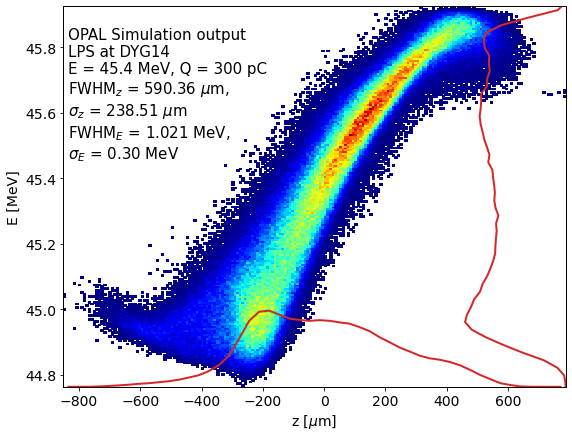

In [75]:
# LPS in backtracking sim

fig, ax = plt.subplots(1,1, figsize = (9, 7))
maxHH = 0.2

# Plot final LPS of simulation
qx = 'z'
qy = 'E'
h5p = H5Parser()
fn = 'tests/sims_exp_Nov2021/case1_fromBackTrack'
print("using directory", fn)
h5p.parse( fn + '/wig.h5', False)
print('spos = ', h5p.getStepAttribute('SPOS', step = 0))
x = h5p.getStepDataset( dsetName = qx, step = 0)
y = np.array(h5p.getStepDataset( dsetName = 'px', step = 0))**2
y += np.array(h5p.getStepDataset( dsetName = 'py', step = 0))**2
y += np.array(h5p.getStepDataset( dsetName = 'pz', step = 0))**2
mc2 = .511 * 1e6
y = mc2 * np.sqrt(1 + y)
x -= np.mean(x)
[hist, bins] = np.histogram(x, bins = 50)
[FWHM,_] = pmf.getFWHM(bins[1:], hist, denom = 2)
FWHM *= 1e6
rms = pmf.getRms(bins[1:], hist) * 1e6
[hist, bins] = np.histogram(y, bins = 50)
[FWHME,_] = pmf.getFWHM(bins[1:], hist, denom = 2)
FWHME *= 1e-6
rmsE = pmf.getRms(bins[1:], hist) * 1e-6
avgE = np.mean(y) * 1e-6
###############################
# Store in csv
outFile = pltpath + '/case1_wigIn_LPS_sim.tsv'
## Write particle number in first line
print('\nSaving particles in file...')
## Write the distribution
df = pd.DataFrame({'z':np.array(h5p.getStepDataset(dsetName = 'z', step = 0)),
                   'pz':np.array(h5p.getStepDataset(dsetName = 'pz', step = 0)),
                  })
df.to_csv(outFile, sep = '\t', index = False, mode = 'w')
###############################
pmf.plotScreenXY(ax, x, y, [qx, qy], type = 'hist2d-hist', factors = [1e6, 1e-6], nbins = 200, color = 3, maxHH = maxHH, enable_cbar = 0)
# Text with info
ax.text(.01, .55, 'OPAL Simulation output \nLPS at DYG14\n' +
           'E = {:.1f} MeV, Q = 300 pC\n'.format(avgE) + 
           'FWHM$_z$ = {:.2f} $\mu$m,\n$\sigma_z$ = {:.2f} $\mu$m\n'.format(FWHM, rms) +
           'FWHM$_E$ = {:.3f} MeV,\n$\sigma_E$ = {:.2f} MeV\n'.format(FWHME, rmsE),
           fontsize = 15, color = 'black', transform = ax.transAxes)

# Save the image
plt.savefig((pltpath + '/OPAL_wigIn_case1.png'),bbox_inches='tight')
plt.show()

## Wiggler in

Getting LPS
Getting Spect only
Getting TDC only
Replacing the E distribution with the one from the spectrometer

 Interpolating...
generating particles...
0 particles have been generated
Finally we have 46449 particles


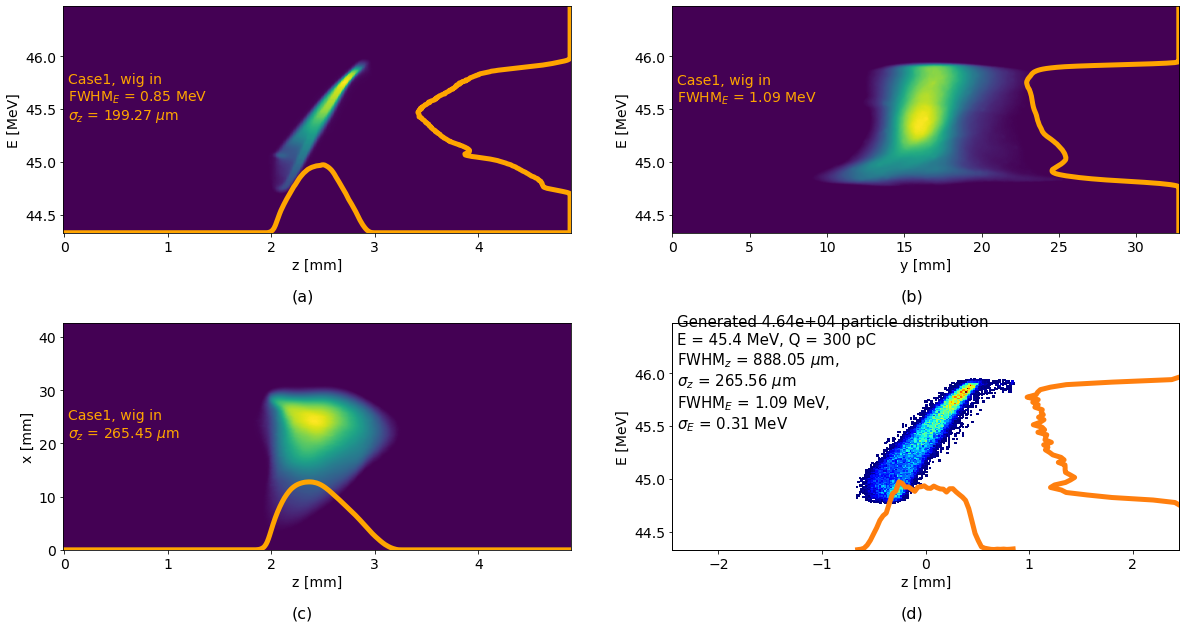

In [61]:
fig,axs = plt.subplots(2,2, figsize = (20,10))
fig.subplots_adjust(hspace=0.4)
    
pmf.sample_3Ms(axs, LPS_fn = pltpath + '/average_case1_wigIn_LPS.txt', 
           specton_fn = pltpath + '/average_case1_wigIn_specton.txt', 
          TDCon_fn = pltpath + '/average_case1_wigIn_TDCon.txt',
          out_fn = pltpath + '/case1_wigIn_LPS_withrmstrafo.tsv', Npart = 5*10**4,
          casename = 'Case1, wig in', show_info = True, plot_trafos = False, 
               sample = True, trafo_rms = True, nbins = 100)

plt.savefig(pltpath + '/LPS_DYG14_case1_wigIn.png', bbox_inches = 'tight')
plt.show()


# Final Comparison

FWHME1.8 0.906420076709202
FWHME2.2 0.9467054134518331
FWHME2 0.9265627450805176
FWHME1.8 1.0213699336754825
FWHME2.2 1.0213699336754825
FWHME2 1.0213699336754825
FWHME1.8 1.0912713963856584
FWHME2.2 1.0912713963856584
FWHME2 1.0912713963856584


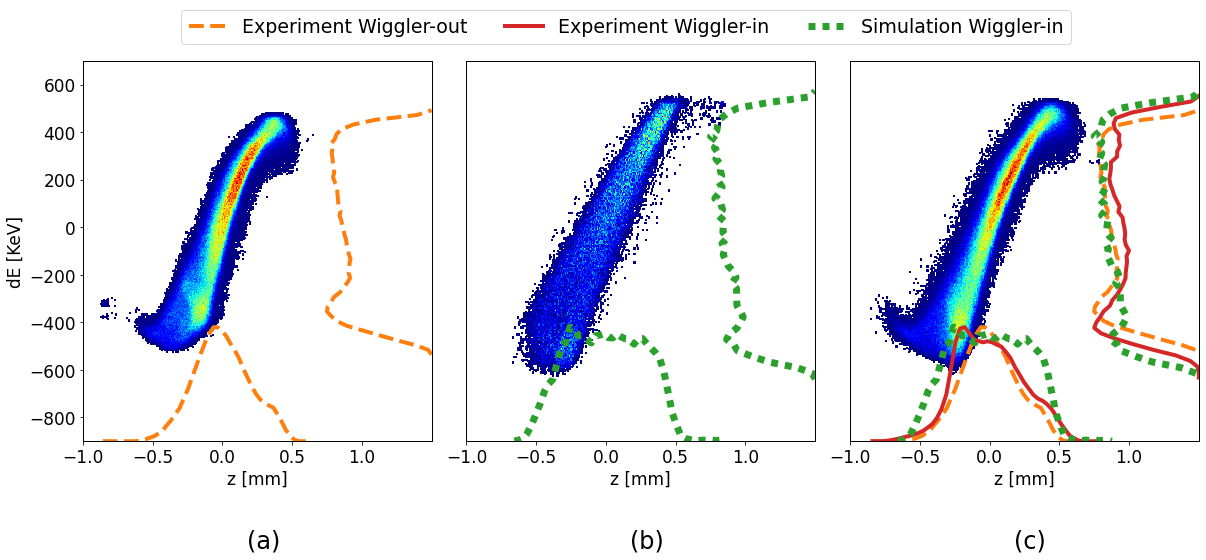

In [2]:
fig, ax = plt.subplots(1,3, figsize = (20, 7))
fig.subplots_adjust(wspace=.1)
ax = ax.reshape(-1)
maxHH = 0.3
customLines = []

# Plot wig out at DYG13, experimental shot
lsLoc = (0, (5, 1))
lsLoc = '--'
lwLoc = 4
qx = 'z'
qy = 'E'
fn = pltpath + '/case1_wigOut_LPS_withrmstrafo.tsv'
df = pd.read_csv(fn, skiprows = 1, sep = r'\s+', names = ['z', 'pz'])
x = df['z']
y = np.array(df['pz'])**2
mc2 = .511 * 1e6
y = mc2 * np.sqrt(1 + y)
y -= np.mean(y) # Absolute energy can't be known, so we only look at energy spread
y += 0*1e3
x -= np.mean(x)
[hist, bins] = np.histogram(x, bins = 50)
[FWHM,_] = pmf.getFWHM(bins[1:], hist, denom = 2)
FWHM *= 1e6
rms = pmf.getRms(bins[1:], hist) * 1e6
[hist, bins] = np.histogram(y, bins = 50)
[FWHME,_] = pmf.getFWHM(bins[1:], hist, denom = 1.8)
FWHME *= 1e-6
print('FWHME1.8', FWHME)
[FWHME,_] = pmf.getFWHM(bins[1:], hist, denom = 2.2)
FWHME *= 1e-6
print('FWHME2.2', FWHME)
[FWHME,_] = pmf.getFWHM(bins[1:], hist, denom = 2)
FWHME *= 1e-6
print('FWHME2', FWHME)
rmsE = pmf.getRms(bins[1:], hist) * 1e-6
avgE = np.mean(y) * 1e-6
pmf.plotScreenXY(ax[0], x, y, [qx, qy], type = 'hist2d-hist', factors = [1e3, 1e-3], 
                 nbins = 200, color = 11, maxHH = maxHH, enable_cbar = 0, lw = lwLoc, ls = lsLoc)
ax[0].set_ylabel('dE [KeV]', fontsize = fs)
pmf.histAx(ax[2], x, axis = 0, bins = 50, maxHH = maxHH, ls = lsLoc, lw = lwLoc, color = 'C11', zorder = 5)
pmf.histAx(ax[2], y, axis = 1, bins = 50, maxHH = maxHH, flip = False, ls = lsLoc, lw = lwLoc, 
       color = 'C11', zorder = 5)
# Text with info
# ax[0].text(.01, .55, 'Experiment LPS,wig out \nat EYG13\n' +
#            'E = {:.1f} MeV, Q = 300 pC\n'.format(avgE) + 
#            'FWHM$_z$ = {:.2f} $\mu$m,\n$\sigma_z$ = {:.2f} $\mu$m\n'.format(FWHM, rms) +
#            'FWHM$_E$ = {:.2f} MeV,\n$\sigma_E$ = {:.2f} MeV\n'.format(FWHME, rmsE),
#            fontsize = 15, color = 'black', transform = ax[0].transAxes)
customLines.append(Line2D([0], [0], color = 'C11', lw = lwLoc, ls = lsLoc))


# Plot wig in at DYG13, simulation
lsLoc = '-'
lwLoc = 4
qx = 'z'
qy = 'E'
fn = pltpath + '/case1_wigIn_LPS_sim.tsv'
df = pd.read_csv(fn, skiprows = 1, sep = r'\s+', names = ['z', 'pz'])
x = df['z']
y = np.array(df['pz'])**2
mc2 = .511 * 1e6
y = mc2 * np.sqrt(1 + y)
y -= np.mean(y) # Absolute energy can't be known, so we only look at energy spread
y -= 15*1e3
x -= np.mean(x)
[hist, bins] = np.histogram(x, bins = 50)
[FWHM,_] = pmf.getFWHM(bins[1:], hist, denom = 2)
FWHM *= 1e6
rms = pmf.getRms(bins[1:], hist) * 1e6
[hist, bins] = np.histogram(y, bins = 50)
[FWHME,_] = pmf.getFWHM(bins[1:], hist, denom = 1.8)
FWHME *= 1e-6
print('FWHME1.8', FWHME)
[FWHME,_] = pmf.getFWHM(bins[1:], hist, denom = 2.2)
FWHME *= 1e-6
print('FWHME2.2', FWHME)
[FWHME,_] = pmf.getFWHM(bins[1:], hist, denom = 2)
FWHME *= 1e-6
print('FWHME2', FWHME)
rmsE = pmf.getRms(bins[1:], hist) * 1e-6
avgE = np.mean(y) * 1e-6
pmf.plotScreenXY(ax[2], x, y, [qx, qy], type = 'hist2d-hist', factors = [1e3, 1e-3], 
                 nbins = 200, color = 3, maxHH = maxHH, enable_cbar = 0, lw = lwLoc, ls = lsLoc)
ax[2].set_ylabel('', fontsize = fs)
# Text with info
# ax[2].text(.01, .55, 'Simulation LPS, wig in \nat EYG13\n' +
#            'E = {:.1f} MeV, Q = 300 pC\n'.format(avgE) + 
#            'FWHM$_z$ = {:.2f} $\mu$m,\n$\sigma_z$ = {:.2f} $\mu$m\n'.format(FWHM, rms) +
#            'FWHM$_E$ = {:.2f} MeV,\n$\sigma_E$ = {:.2f} MeV\n'.format(FWHME, rmsE),
#            fontsize = 15, color = 'black', transform = ax[2].transAxes)
customLines.append(Line2D([0], [0], color = 'C3', lw = lwLoc, ls = lsLoc))


# Plot wig in at DYG13, experimental shot
lsLoc = (0, (1,1))
lwLoc = 7
qx = 'z'
qy = 'E'
fn = pltpath + '/case1_wigIn_LPS_withrmstrafo.tsv'
df = pd.read_csv(fn, skiprows = 1, sep = r'\s+', names = ['z', 'pz'])
x = df['z']
y = np.array(df['pz'])**2
mc2 = .511 * 1e6
y = mc2 * np.sqrt(1 + y)
y -= np.mean(y) # Absolute energy can't be known, so we only look at energy spread
# y += 25*1e3
x -= np.mean(x)
[hist, bins] = np.histogram(x, bins = 50)
[FWHM,_] = pmf.getFWHM(bins[1:], hist, denom = 2)
FWHM *= 1e6
rms = pmf.getRms(bins[1:], hist) * 1e6
[hist, bins] = np.histogram(y, bins = 50)
[FWHME,_] = pmf.getFWHM(bins[1:], hist, denom = 1.8)
FWHME *= 1e-6
print('FWHME1.8', FWHME)
[FWHME,_] = pmf.getFWHM(bins[1:], hist, denom = 2.2)
FWHME *= 1e-6
print('FWHME2.2', FWHME)
[FWHME,_] = pmf.getFWHM(bins[1:], hist, denom = 2)
FWHME *= 1e-6
print('FWHME2', FWHME)
rmsE = pmf.getRms(bins[1:], hist) * 1e-6
avgE = np.mean(y) * 1e-6
pmf.plotScreenXY(ax[1], x, y, [qx, qy], type = 'hist2d-hist', factors = [1e3, 1e-3], 
                 nbins = 200, color = 2, maxHH = maxHH, enable_cbar = 0, lw = lwLoc, ls = lsLoc)
ax[1].set_ylabel('', fontsize = fs)
pmf.histAx(ax[2], x, axis = 0, bins = 50, maxHH = maxHH, ls = lsLoc, lw = lwLoc, color = 'C2', zorder = 5)
pmf.histAx(ax[2], y, axis = 1, bins = 50, maxHH = maxHH, flip = False, 
       ls = lsLoc, lw = lwLoc, color = 'C2', zorder = 5)
# Text with info
# ax[1].text(.01, .55, 'Experiment LPS,wig in \nat EYG13\n' +
#            'E = {:.1f} MeV, Q = 300 pC\n'.format(avgE) + 
#            'FWHM$_z$ = {:.2f} $\mu$m,\n$\sigma_z$ = {:.2f} $\mu$m\n'.format(FWHM, rms) +
#            'FWHM$_E$ = {:.2f} MeV,\n$\sigma_E$ = {:.2f} MeV\n'.format(FWHME, rmsE),
#            fontsize = 15, color = 'black', transform = ax[1].transAxes)
customLines.append(Line2D([0], [0], color = 'C2', lw = lwLoc, ls = lsLoc))


# Custom legend
fig.legend(customLines, ['Experiment Wiggler-out', 'Experiment Wiggler-in', 'Simulation Wiggler-in'], 
           fontsize = fs+2, loc = (0.15, 0.92), ncol = 3)

# Adjust axes to have same scale
pmf.adjust_axes_limits(ax, 'x')
pmf.adjust_axes_limits(ax, 'y')

# Add axis labels when necessary
for i in range(3):
    ax[i].tick_params(axis = 'both', labelsize = fs)
    ax[i].set_xlim([-1.0, 1.5])
    ax[i].set_ylim([-900, 700])
    if i > 0:
        ax[i].set_yticks([])
ax[0].text(0.47, -0.28, '(a)', fontsize = fs+7, transform = ax[0].transAxes)
ax[1].text(0.47, -0.28, '(b)', fontsize = fs+7, transform = ax[1].transAxes)
ax[2].text(0.47, -0.28, '(c)', fontsize = fs+7, transform = ax[2].transAxes)
for i in range(3):
    ax[i].tick_params( axis = 'both', labelsize = fs )
    ax[i].set_xlabel('z [mm]', fontsize = fs)
    ax[i].set_xticks([-1,-.5,0,.5,1])

# Save the image
plt.savefig((pltpath + '/finalComparison_case1.png'),bbox_inches='tight')
plt.show()


In [137]:
np.linspace(0+.1,1-.1,5)

array([0.1, 0.3, 0.5, 0.7, 0.9])